In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [6]:
df = pd.read_csv('Datasets\dataset_final.csv')
df_poi = pd.read_csv('Datasets\pois_filtrados.csv')
df_paradero = pd.read_csv('Datasets\Paraderos.csv')
df_metro = pd.read_csv('Datasets\Metros.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25215 entries, 0 to 25214
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25215 non-null  int64  
 1   monto                 25215 non-null  int64  
 2   superficie_t          25215 non-null  float64
 3   dormitorios           25215 non-null  int64  
 4   dormitorios_faltante  25215 non-null  int64  
 5   banos                 25215 non-null  int64  
 6   banos_faltante        25215 non-null  int64  
 7   antiguedad            25215 non-null  int64  
 8   antiguedad_faltante   25215 non-null  int64  
 9   Or_N                  25215 non-null  int64  
 10  Or_S                  25215 non-null  int64  
 11  Or_E                  25215 non-null  int64  
 12  Or_O                  25215 non-null  int64  
 13  Or_Faltante           25215 non-null  int64  
 14  terraza               25215 non-null  float64
 15  estacionamiento    

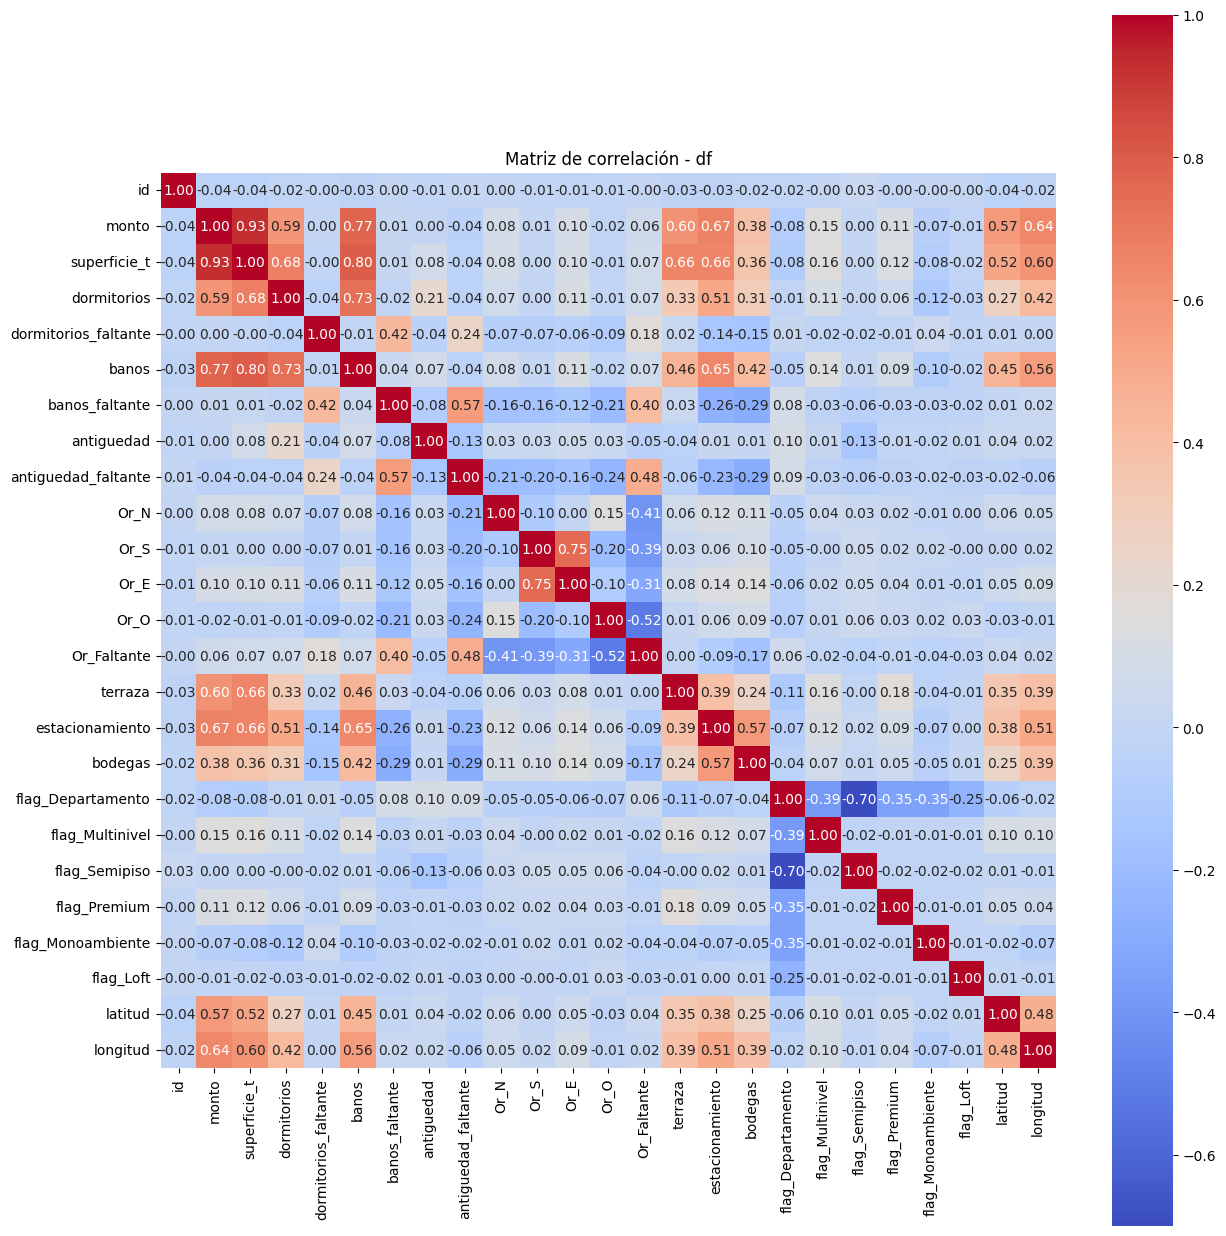

In [19]:
# Crear matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Graficar la matriz de correlación
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación - df")
plt.tight_layout()
plt.show()

In [5]:
df_poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39052 entries, 0 to 39051
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   longitude    39052 non-null  float64
 1   latitude     39052 non-null  float64
 2   type         39052 non-null  object 
 3   filterrank   39052 non-null  int64  
 4   category_en  34315 non-null  object 
 5   sizerank     39052 non-null  int64  
 6   maki         39052 non-null  object 
 7   class        39052 non-null  object 
 8   name         33257 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.7+ MB


In [9]:
df_paradero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12635 entries, 0 to 12634
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         12635 non-null  int64  
 1   id          12635 non-null  int64  
 2   codigo      12635 non-null  object 
 3   simt        11774 non-null  object 
 4   tipo        12635 non-null  object 
 5   clasificac  12635 non-null  object 
 6   comuna      12635 non-null  object 
 7   zona        12635 non-null  object 
 8   eje         12635 non-null  object 
 9   desde       12432 non-null  object 
 10  hacia       12631 non-null  object 
 11  sentido     12635 non-null  object 
 12  fila_super  12635 non-null  object 
 13  fila_infer  12635 non-null  object 
 14  grupo_de_p  12635 non-null  object 
 15  identifica  12634 non-null  object 
 16  nombre_ust  12635 non-null  object 
 17  x           12635 non-null  float64
 18  y           12635 non-null  float64
 19  zona_paga   12635 non-nul

In [20]:
df_paradero = df_paradero[['id', 'simt', 'longitud', 'latitud']]
df_paradero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12635 entries, 0 to 12634
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        12635 non-null  int64  
 1   simt      11774 non-null  object 
 2   longitud  12635 non-null  float64
 3   latitud   12635 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 395.0+ KB


In [12]:
df_paradero.sample(5)

,FID,id,codigo,simt,tipo,clasificac,comuna,zona,eje,desde,hacia,sentido,fila_super,fila_infer,grupo_de_p,identifica,nombre_ust,x,y,zona_paga,n__et,corredor,ubica_corr,rts,tipo_rts,rm,estado_rm,estado,existe_se,codigo_ant,fecha_fich,cod_sol_pa,comentario,longitud,latitud
8742,8743,8309,T-1-3-NS-6,PB261,PS,ELIMINADO,INDEPENDENCIA,B,AV. INDEPENDENCIA,PANTALEàN VLEZ,T. CORNEJO,N-S,TRISTµN CORNEJO,AV. INDEPENDENCIA,-,-,TRISTµN CORNEJO / AV. INDEPENDENCIA,345235.96,6302788.35,0,NaN,NaN,NaN,NaN,NaN,0,NaN,SàLO SE¥AL,UC-Sept/2010,NaN,NaN,NaN,ELIMINACIàN DE PARADAS DIVIDIDAS Y MEJORAMIENT...,-70.664238,-33.403081
2304,2305,3094,L-13-102-15-NS,PI1417,PS,ACTIVO,MAIPé,I,PDTE. JORGE ALESSANDRI,EL MOLINO,LA SINFONIA,N-S,LA SINFONIA,PDTE. JORGE ALESSANDRI,-,-,LA SINFONIA / PDTE. JORGE ALESSANDRI,336239.92,6293127.18,0,NaN,NaN,NaN,NaN,NaN,0,NaN,SàLO SE¥AL,SERVIU-Dic/2010,NaN,NaN,NaN,NaN,-70.762698,-33.488846
4057,4058,4855,L-23-26-65-OP,PG860,PS,ACTIVO,LA PINTANA,G,AV. LO BLANCO,EL ROBLE,EL RAULI,O-P,EL RAULÖ,AV. LO BLANCO,-,-,EL RAULÖ / AV. LO BLANCO,347592.22,6282394.72,0,NaN,NaN,NaN,1.0,Refugio 4(m),0,NaN,CON REFUGIO,UC-Dic/2011-Instalaci¢n,NaN,NaN,2865.0,NaN,-70.642378,-33.587287
7745,7746,7746,L-34-38-5-OP,PF647,PS,ACTIVO,PUENTE ALTO,F,AV. ERNESTO ALVEAR,1 ORIENTE,CENTRAL,O-P,CENTRAL,AV. ERNESTO ALVEAR,-,-,CENTRAL / AV. ERNESTO ALVEAR,353030.79,6280169.43,0,NaN,NaN,NaN,1.0,Refugio 4(m),0,NaN,CON REFUGIO,SERVIU-Dic/2010,NaN,NaN,NaN,NaN,-70.584158,-33.608114
11311,11312,11302,T-23-205-NS-80,PG177,ET,ACTIVO,LA PINTANA,G,AV. SANTA ROSA,EL OMBé,LA PRIMAVERA,N-S,LA PRIMAVERA,AV. SANTA ROSA,PARADERO 41 SANTA ROSA,1,PARADA 1 / PARADERO 41 SANTA ROSA,348979.32,6281455.16,0,NaN,12.0,INTERNO,1.0,Refugio 9(m),0,NaN,CON REFUGIO,UC-Ene/2011,NaN,NaN,NaN,NaN,-70.627595,-33.595955


In [21]:
df_metro = df_metro[['id', 'nombre', 'tipo', 'linea', 'longitud', 'latitud']]
df_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        117 non-null    int64  
 1   nombre    117 non-null    object 
 2   tipo      117 non-null    object 
 3   linea     117 non-null    object 
 4   longitud  117 non-null    float64
 5   latitud   117 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.6+ KB


In [14]:
df_metro.sample(5)

,X,Y,FID,objectid,id,especial,estacion,nombre,temporal,f1,tipo,linea,longitud,latitud
106,-7.874649e+06,-3.955513e+06,107,0,107,EXISTENTE,EXISTENTE,BARRANCAS,NaN,0,ESTACION METRO,Linea 5,-70.739176,-33.452441
38,-7.861290e+06,-3.960032e+06,39,39,39,EXISTENTE,EXISTENTE,CARLOS VALDOVINO,NaN,1,ESTACION METRO,Linea 5,-70.619166,-33.486302
68,-7.856945e+06,-3.960228e+06,69,69,69,EXISTENTE,EXISTENTE,QUILIN,NaN,0,ESTACION METRO,Linea 4,-70.580134,-33.487770
69,-7.857722e+06,-3.961899e+06,70,70,70,EXISTENTE,EXISTENTE,LAS TORRES,NaN,0,ESTACION METRO,Linea 4,-70.587117,-33.500288
20,-7.863723e+06,-3.953960e+06,21,21,21,EXISTENTE,EXISTENTE,UNIVERSIDAD CATOLICA,NaN,1,ESTACION METRO,Linea 1,-70.641030,-33.440799


In [15]:
df_metro['tipo'].unique()

array(['ESTACION METRO'], dtype=object)

In [16]:
df_inicios = pd.read_csv('scrap_depto/datos_deptos_prueba.csv')

In [17]:
df_inicios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              198 non-null    object 
 1   nombre            198 non-null    object 
 2   fecha_consultado  198 non-null    object 
 3   fecha_publicado   164 non-null    object 
 4   divisa            198 non-null    object 
 5   monto             198 non-null    object 
 6   ppm2              179 non-null    object 
 7   ppm2_avg          179 non-null    object 
 8   superficie_t      198 non-null    object 
 9   superficie_u      194 non-null    object 
 10  terraza           134 non-null    object 
 11  ambientes         52 non-null     float64
 12  dormitorios       196 non-null    float64
 13  banos             190 non-null    float64
 14  ubicacion         198 non-null    object 
 15  estacionamiento   137 non-null    float64
 16  bodegas           99 non-null     float64
 1

In [18]:
df_inicios.head(5)

,link,nombre,fecha_consultado,fecha_publicado,divisa,monto,ppm2,ppm2_avg,superficie_t,superficie_u,terraza,ambientes,dormitorios,banos,ubicacion,estacionamiento,bodegas,cantidad_pisos,dep_por_piso,piso,tipo_depto,orientacion,antiguedad,gastos_comunes,coordenadas
0,https://portalinmobiliario.com/MLC-2859257598-...,Departamento En Venta De 1 Dorm. En San Miguel,2025-05-12,Publicado hace 55 días,UF,2.550,82 UF/m²,69 UF/m²,35 m²,31 m²,4 m²,NaN,1.0,1.0,"Segunda Avenida / Tercera Transversal, Ciudad ...",1.0,1.0,17.0,7.0,17.0,Departamento,N,8 años,NaN,-33.5040711%2C-70.659998
1,https://portalinmobiliario.com/MLC-2860872146-...,"Depto. Como Nuevo 3d, Metro Las Torres.",2025-05-12,Publicado hace 52 días,UF,3.650,54 UF/m²,59 UF/m²,72 m²,67 m²,5 m²,NaN,3.0,2.0,"Av. Américo Vespucio 4200 - 4500, Macul, Chile...",1.0,NaN,18.0,10.0,2.0,Departamento,SO,5 años,NaN,-33.4966777%2C-70.5855593
2,https://portalinmobiliario.com/MLC-1590534715-...,"Uf 3.800 Venta Dpto,santa Isabel/fray Camilo H...",2025-05-12,Publicado hace 48 días,UF,3.800,66 UF/m²,68 UF/m²,57 m²,57 m²,4 m²,NaN,2.0,2.0,"Av. Sta. Isabel 199, Santiago, Santa Isabel, S...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.4478017%2C-70.6343378
3,https://portalinmobiliario.com/MLC-2860935956-...,"Conjunto Duplo Vista Bella,ovalle",2025-05-12,Publicado hace 52 días,$,46.000.000,NaN,NaN,51 m²,49 m²,NaN,2.0,2.0,NaN,Verifica que el inmueble exista y desconfía si...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.5891123%2C-71.1748975
4,https://portalinmobiliario.com/MLC-1584809261-...,Gran Vista Cercano A Metro H. De Aguirre,2025-05-12,Publicado hace 2 meses,UF,5.570,163 UF/m²,144 UF/m²,"42,84 m²","34,1 m²","8,7 m²",NaN,1.0,1.0,"Las Trinitarias 6900 - 7200, Las Condes, Metro...",1.0,1.0,9.0,12.0,6.0,Departamento,NP,1 años,NaN,-33.404362%2C-70.5587992
